<a href="https://colab.research.google.com/github/Nayibialeman/Data_Science_Portfolio/blob/main/Proyects/Insurance_Model/Costo_Facturado_insurance_modelo_Rforest_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelado supervisado
# Modelos de regresión - Random Forest


# Regresión

Un **modelo de regresión** se define como la relación entre una o varias variables independendientes con respecto a una variable dependiente.

Una manera de ejemplificarlo es con algunos aspectos de la vida diaria: un modelo de regresión puede ser aquel que explica la relación del tiempo y la cantidad de gasolina utiizada al manejar. El conocimiento empírico dicta que se tratará de una relación proporcional, donde a mayor tiempo de conducción, mayor cantidad de combustible se consume.

Si se haya ese modelo (representable con una ecuación matemática), es posible determinar cuánto combustible se necesita para manejar durante tres horas.

Para conocer la ecuación que facilitará el conocimiento sobre cuánta gasolina se requiere para llegar. por ejemplo, hasta Acapulco, es necesario ejecutar datos en un conjunto.

El ejemplo anterior se conoce como **modelo univariable**, pues solo utiliza una variable (el tiempo) para determinar el combustible necesario. Sin embargo, habrá ocasiones en las cuales influyen dos o más variables.

Si se recupera el ejemplo de la gasolina que requiere el auto para ir a Acapulco, podrían considerarse también aspectos como la temperatura, la distancia, el tipo de camino, el pago de casetas e incluso si es un viaje unipersonal o con toda la familia.

Seguro caíste en cuenta de que la cantidad de combustible está sujeta a múltiples variables y que unas impactarán más que otras. Así, cuando un modelo considera dos o más variables, se le denomina **multivariable**.



# Lectura y pre-procesamiento


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%run /content/drive/MyDrive/DataAn/Proyects/Insurance_model/Functions.ipynb

# Data set

- age: edad del beneficiario principal

- sex: género del contratante del seguro, femenino, masculino

- bmi: Índice de Masa Corporal, que proporciona una comprensión del peso corporal en relación con la altura, índice objetivo del peso corporal (kg / m ^ 2) utilizando la relación entre la altura y el peso, idealmente 18.5 a 24.9

- children: Número de hijos cubiertos por el seguro de salud / Número de dependientes

- smoker: Fumador

- region: área de residencia del beneficiario en Estados Unidos, noreste, sureste, suroeste, noroeste.

- charges: Costos médicos individuales facturados por el seguro de salud

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataAn/Proyects/Insurance_model/insurance.csv')

In [ ]:
len(df)*.10

133.8

In [ ]:
df[df['sex']!='male'].sample(134)

,age,sex,bmi,children,smoker,region,charges
412,26,female,17.195,2,yes,northeast,14455.64405
1193,48,female,36.575,0,no,northwest,8671.19125
5,31,female,25.740,0,no,southeast,3756.62160
735,49,female,34.770,1,no,northwest,9583.89330
1334,18,female,31.920,0,no,northeast,2205.98080
...,...,...,...,...,...,...,...
1093,22,female,30.400,0,yes,northwest,33907.54800
307,30,female,33.330,1,no,southeast,4151.02870
383,35,female,43.340,2,no,southeast,5846.91760
612,18,female,33.155,0,no,northeast,2207.69745


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Estadísticas descriptivas:
               age          

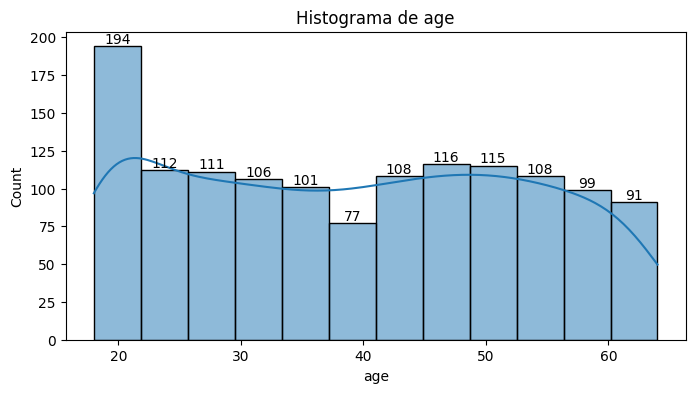

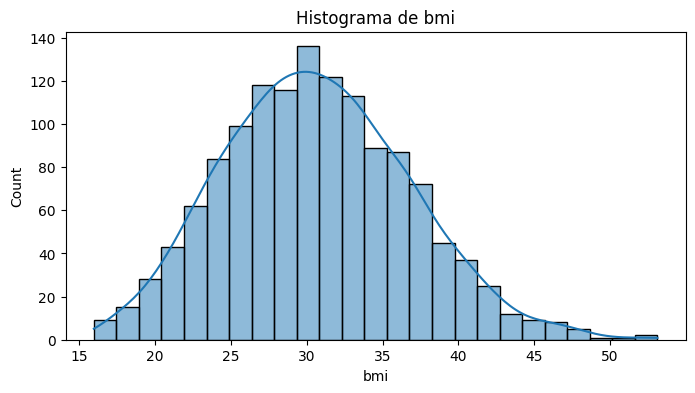

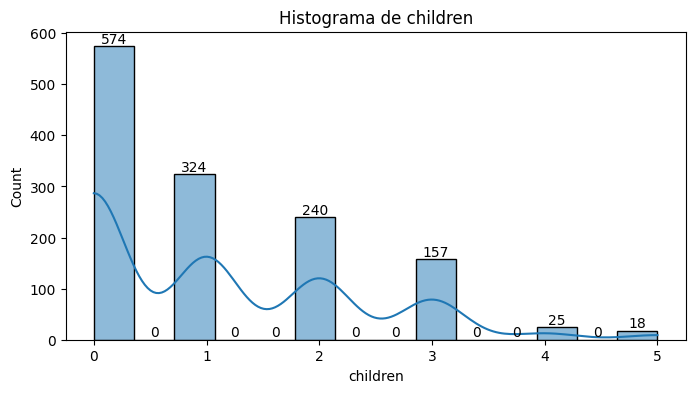

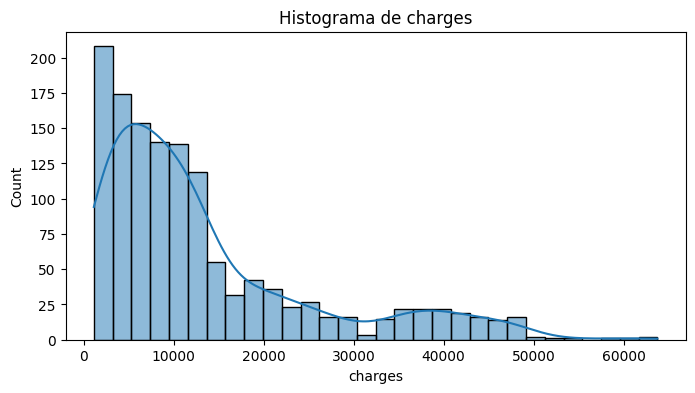

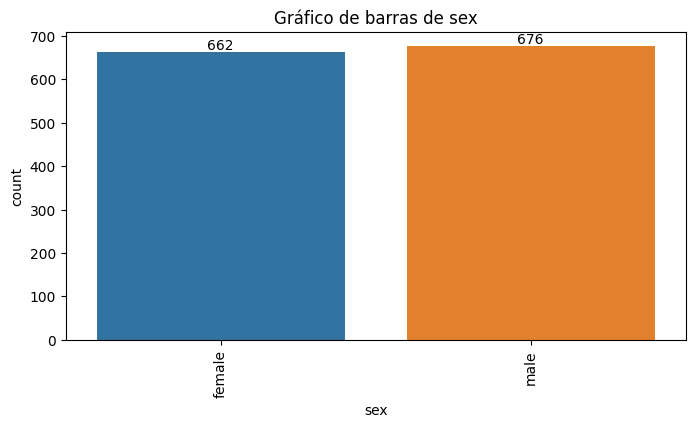

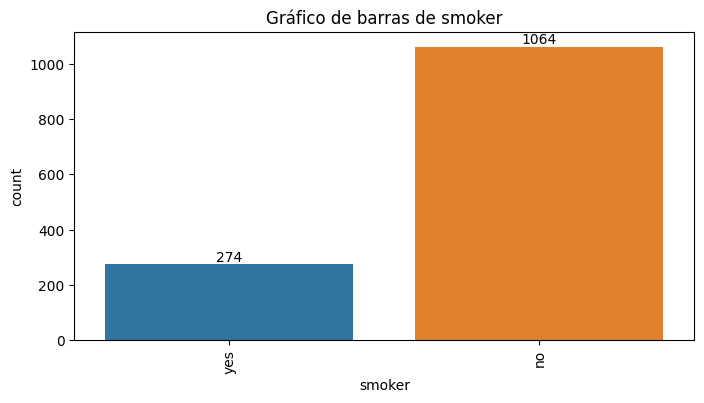

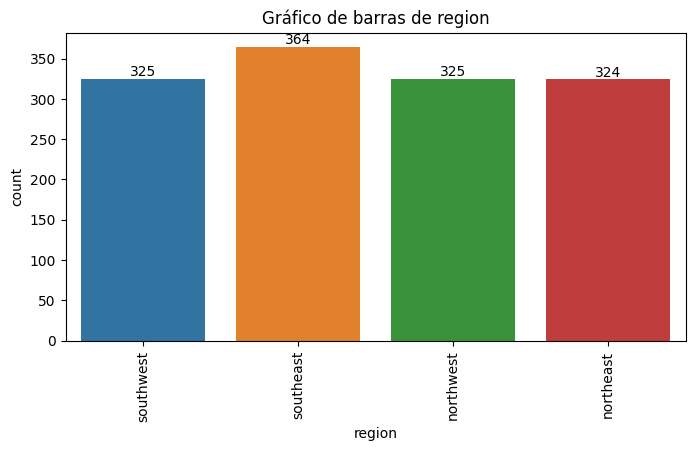


Matriz de Correlación:


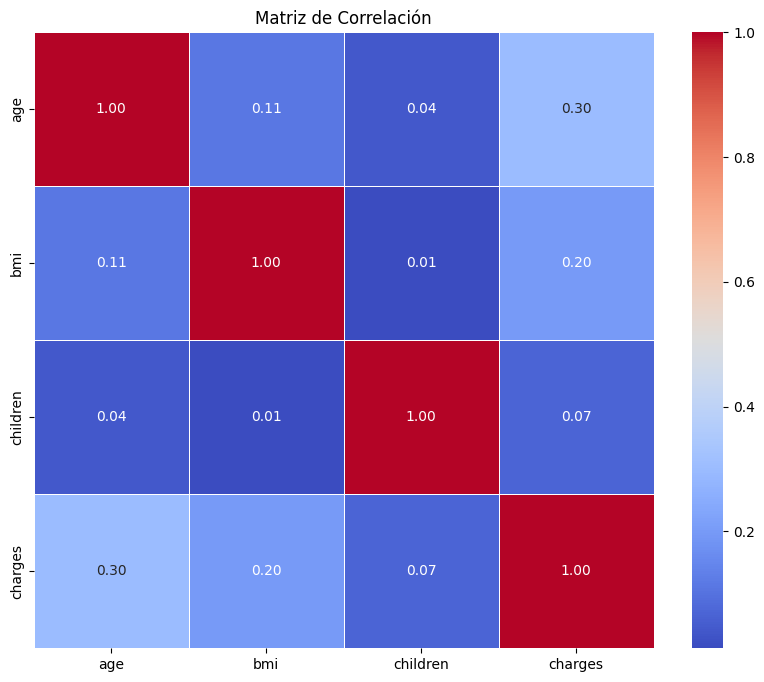

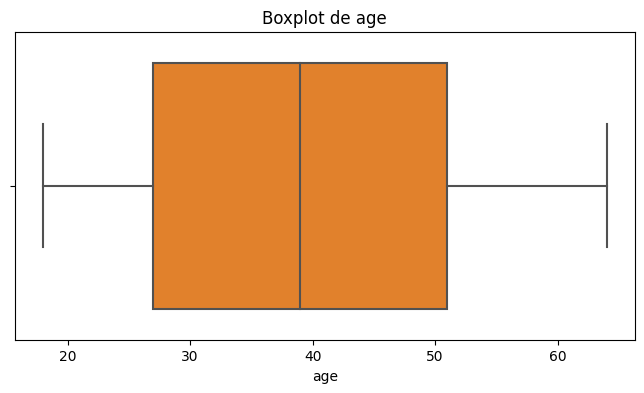

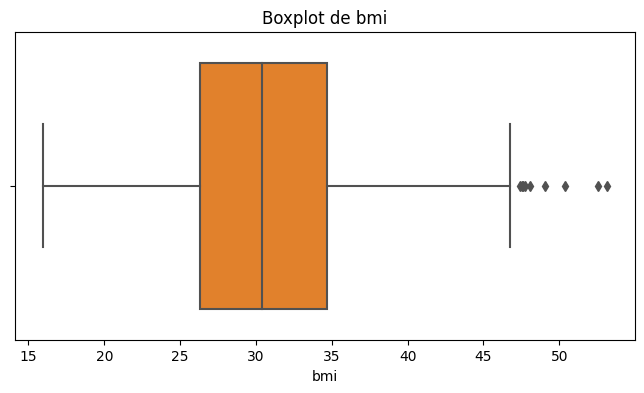

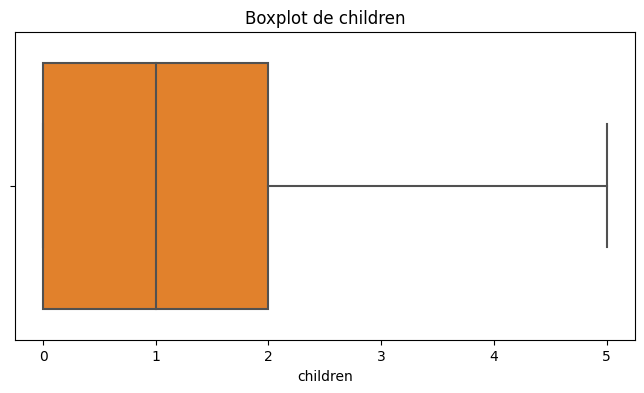

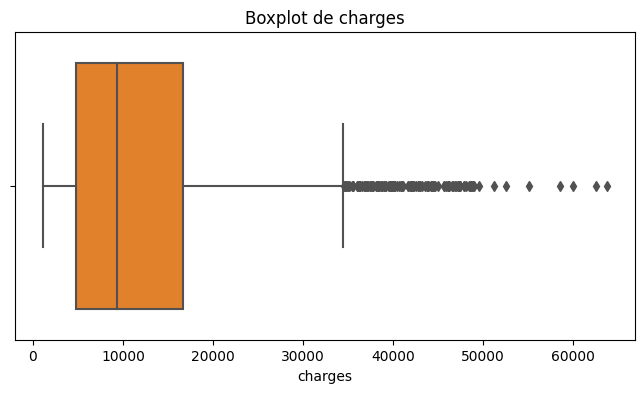


Matriz de Dispersión para Multicolinealidad Visual:


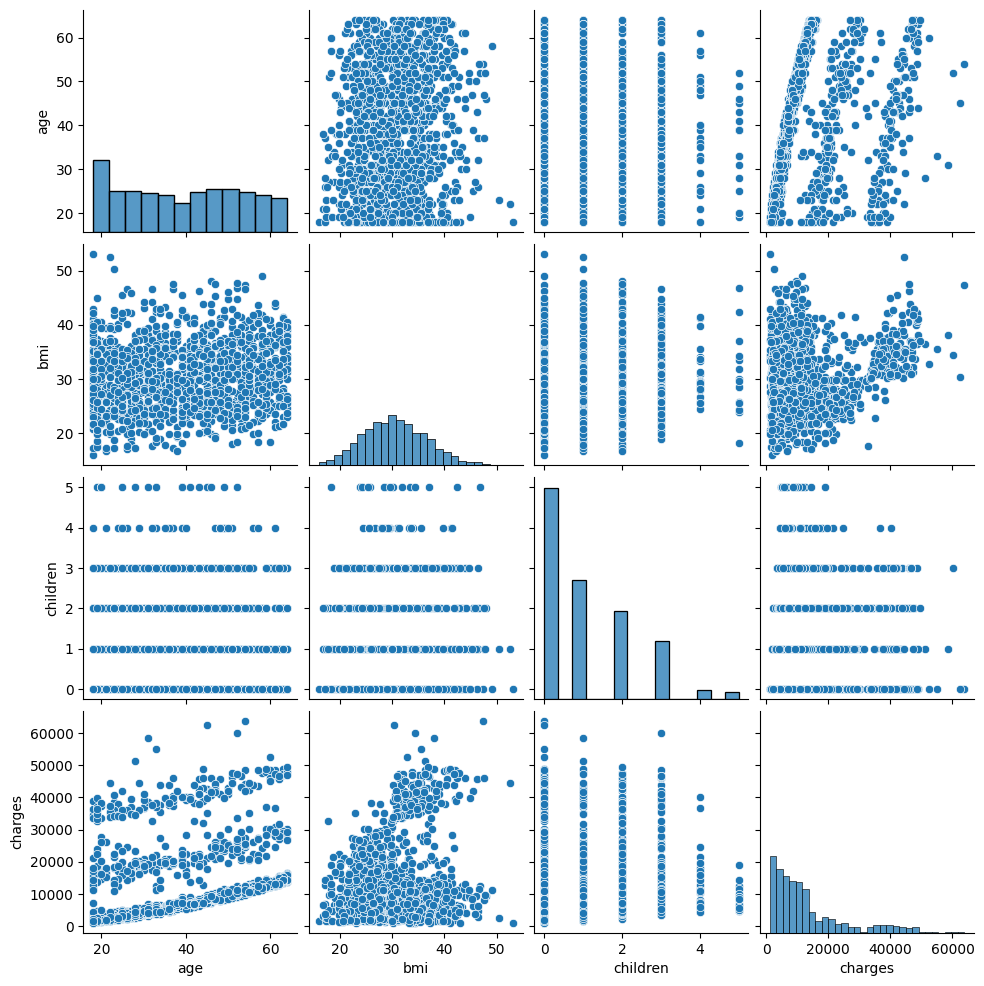

In [ ]:
#La completitud se encuentra al 100%
#tipo de datos correcto
realizar_eda(df)

In [ ]:
df = manejar_outliers_por_metodo(df, metodo = 'rango', atipicos_threshold=1.5)

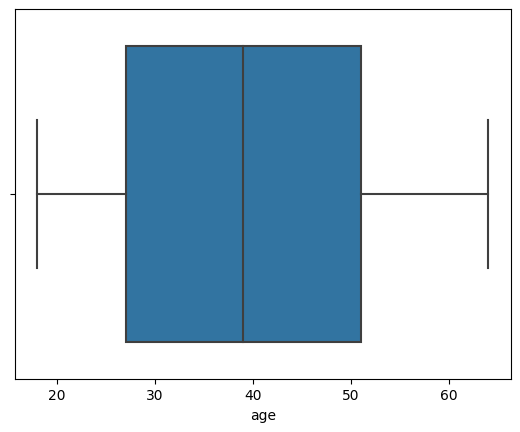

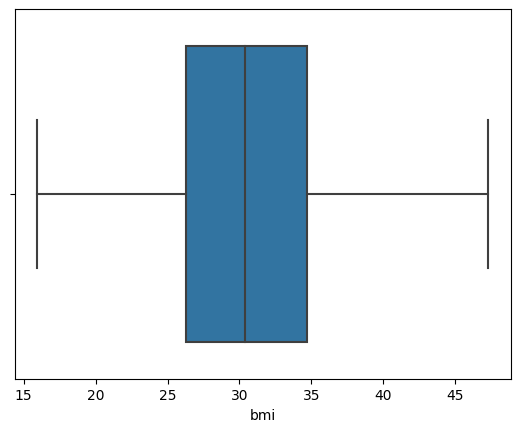

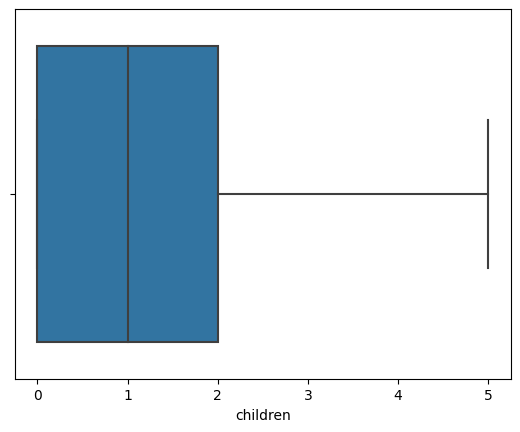

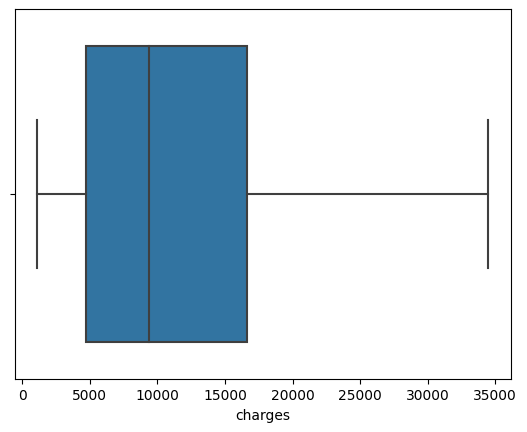

In [ ]:
# Boxplot para detectar outliers en 'Age' y 'EstimatedSalary'

for c in df.select_dtypes(include=['int64', 'float64']).columns:
  sns.boxplot(x=c, data=df)
  plt.show()

In [ ]:
#Se realiza Dummies en categoricas
df = Dummies(df, ['sex','smoker','region'])

In [ ]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Importamos las librerias necesarias
import numpy as np
import pandas as pd


# scikit-learn
from sklearn.dummy           import DummyClassifier
from sklearn.linear_model    import LogisticRegression
from sklearn.linear_model    import LinearRegression
from sklearn.linear_model    import Lasso
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import roc_curve
from sklearn.metrics         import roc_auc_score
from sklearn.model_selection import train_test_split

In [ ]:
df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

### Determinar variables dependientes e independientes

Analiza el conjunto de datos: el primer paso es detectar qué predecir. En este dataset se quiere el costo médico facturado, para ello se toma la columna `charges`, que será la variable objetivo o variable dependiente.

Las demás variables condicionarán el resultado final, es decir, características del asegurado.

In [ ]:
# Define la variable target (charges)
y = df['charges']

Hasta aquí el proceso para la variable objetivo o variable dependiente. Ahora, se hará lo propio con las variables independientes.

In [ ]:
# Define el conjunto de variables independientes
X = df.drop('charges', axis = 1)

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


Verás que esta variable se denomina `X` (en mayúscula), y aunque puedes llamarla como prefieras, regularmente se usa este nombre.


Finalmente, dividimos nuestras variables en los conjuntos de entrenamiento (los que usamos para entrenar el modelo) y prueba (conjuntos que usamos para probar la efectividad del modelo)

In [ ]:
#Division en conjuntos prueba y entrenamiento

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## La fórmula de regresión lineal con tres variables independientes

Como se ha mencionado, la regresión líneal es una relación proporcional entre las variables independientes y la variable dependiente. A continuación se muestra la fórmula:
$$
y = b + w_{0} x_{0} + w_{1} x_{1} + w_{2} x_{2}
$$
Donde:
- $y$ es la variable dependiente, o sea, el resultado de resolver la ecuación.
- $b$ es la constante de origen.
- $w_i x_i$ (entiéndase que la $i$ vale $0$, $1$, $2$) es el peso que tiene cada variable para el resultado final.

No te procupes: a continuación se explicará mediante un ejemplo qué sucede.

Imagina que un banco determina cuánto dinero está dispuesto a prestar a sus clientes. Para hacerlo, considera muchas variables, como edad, salario, estado civil, etc.

Se parte del supuesto de que para el préstamo de base el banco ofrece 5 mil pesos. Por cada año cumplido prestará mil pesos, por cada peso de salario prestará 0.05 pesos y si la persona está casada, entonces prestará 3 mil pesos más.

Por lo tanto, su fórmula sería:
$$
Préstamo = 5000 + 1000x_1+ 0.05x_2 + 3000x_3
$$

Cada factor tiene un peso distinto, o sea, uno dará cantidades distintas por cada unidad, similar a la fórmula. $w_i$ dice el peso que tendrá, es decir, su relevancia para determinar el número final. $X_i$ es el valor del conjunto de datos(estandarizado), mientras que $b$ es un valor incial, incluso si los demás valores son $0$.

Al usar este modelo, Python determinará los valores.

Otro detalle a considerar es que la fórmula y los ejemplos son funcionales para tres variables, pero aplican a la cantidad que requieras, por ello, la fórmula se ajustaría de la siguiente manera:
$$
y = b + w_{i} x_{i} + \dots + w_{n} x_{n}
$$


## Entrenamiento y predicción utilizando el objeto de regresión lineal de sklearn

**Sklearn** es un conjunto de funciones y objetos útiles para los modelos de predicción. Esta herramienta ya tiene los cálculos matemáticos necesarios para predecir y evaluar los modelos.

A continuación, aprenderás cómo aplicar **Sklearn** en modelos de regresión líneal.

El primer paso es crear un objeto; en este ejemplo, se llama `modelo_LinReg` (aunque algunos lo nombran como `RegresionLineal`, `modelo`, `RLmodel`) y este objeto será el modelo en sí.

El objeto es igual a `LinearRegression()`. Recuerda que esta función se importó al inicio, en la línea:
```python
from sklearn.linear_model import LinearRegression
```

Si todavía no has hecho esta importación, este es un buen momento.

El segundo paso es «entrenar» el modelo, es decir, hacer el ajuste del objeto con Python; para hacerlo, se recurre a la función `.fit`, la cual tiene dos parámetros: **el primero, las variables independientes** (o `X`, como en el ejemplo), y **la segunda, la variable objetivo** (o `y,` según el ejemplo). Recuerda, la variable dependiente (`y`) es un _array_ de una sola columna, mientras que la variable independiente corresponde a una o más columnas; en cualquier caso, las variables deben tener la misma cantidad de filas.





In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
modelo_LinReg = LinearRegression()
modelo_LinReg.fit(X_train, y_train)


LinearRegression()

Al correr el modelo pensarás que no ha sucedido nada, pero en realidad el objeto `modelo_LinReg` se ha entrenado.

Para predecir el valor de la variable dependiente `y`, se solicita con la función `.predict`, aplicable solo al objeto del modelo. En el ejemplo se escribiría como sigue:
```python
y_pred = modelo_LinReg.predict(X_test)
```

En los paréntesis se indican las variables dependientes para predecir `y`. En este punto, **los tres valores están escalados** (los datos ingresados en `X`) y deben **respetar ese orden**.

In [ ]:
y_pred = modelo_LinReg.predict(X_test)

A continuación, se muestra una comparación entre la variable dependiente real (`y`) y la variable dependiente predecida (`prediccion_y`). Recuerda, estos valores están escalados.

In [ ]:
pd.DataFrame({'Realidad': y_test,
              'Prediccion': y_pred}).head(20)

,Realidad,Prediccion
345,6184.299400,7203.240737
768,14319.031000,15414.900387
148,10959.694700,13236.891118
52,23568.272000,29634.353803
1297,4340.440900,4822.839667
74,7726.854000,8788.329330
282,4237.126550,6050.354868
904,12644.589000,13495.796578
1241,34489.350562,35360.075153
304,12646.207000,14259.415024


# Medidas de evaluación

## R^2

Como verás, los valores son similares pero no exactos.

Una forma de determinar esa discrepancia entre variables dependientes e independientes es mediante $R^2$, la cual usa la función `.score` aplicado al objeto del modelo y tiene dos parámetros: la variable independiente escalada o `X` y la variable dependiente escalada o `y`.

In [ ]:
# Revisa la medida de R^2 de la regresión anterior
modelo_LinReg.score(X,y)

0.7477716326234923

 En el contexto de regresión lineal, el coeficiente de determinación R^2 es una medida que indica la proporción de la varianza en la variable dependiente que puede ser explicada por la variable independiente(s) en el modelo. R^2 varía entre 0 y 1, donde:

- R^2 = 0 indica que el modelo no explica nada de la variabilidad de la variable dependiente a través de la variable independiente(s), es decir, el modelo no se ajusta en absoluto.

- R^2 = 1 indica que el modelo explica toda la variabilidad de la variable dependiente a través de la variable independiente(s), es decir, el modelo se ajusta perfectamente a los datos.

En este caso, un valor de R^2 = 0.75 significa que aproximadamente el 75% de la variabilidad en la variable dependiente puede ser explicada por la variable independiente(s) en tu modelo de regresión lineal. Esto indica que el modelo tiene un buen ajuste y explica una gran parte de la variabilidad en la variable dependiente en función de la variable independiente(s). Es un buen R^2 en muchos contextos y sugiere que el modelo tiene cierta capacidad predictiva.



## Error Absoluto Medio (MAE)

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 3305.297944257158


El Error Absoluto Medio (MAE) es una medida que indica el promedio de las diferencias absolutas entre las predicciones de un modelo y los valores reales en un conjunto de datos. En este caso, un MAE de aproximadamente 3986.09 significa que, en promedio, las predicciones del modelo difieren en alrededor de 3986.09 unidades de la variable de interés en valor absoluto.

El MAE se interpreta en la misma unidad que la variable de interés, lo que lo hace fácil de comprender. Cuanto menor sea el MAE, mejor será la capacidad predictiva del modelo, ya que indicará que las predicciones están más cerca de los valores reales.

En resumen, un MAE de 4640.20 indica que, en promedio, el modelo se equivoca en alrededor de 4640.20 unidades al predecir la variable de interés en valor absoluto. Sin más contexto sobre la naturaleza de los datos y el dominio en el que se está aplicando el modelo, es difícil determinar si este valor de MAE es considerado bueno o malo. La interpretación depende del contexto específico y de las expectativas en relación con la variable que se está prediciendo.

## Error Cuadrático Medio (MSE, por sus siglas en inglés)

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 26817680.71996999


El Error Cuadrático Medio (MSE, por sus siglas en inglés) es una medida que indica el promedio de las diferencias al cuadrado entre las predicciones de un modelo y los valores reales en un conjunto de datos. En tu caso, un MSE de aproximadamente 34494274.66 significa que, en promedio, las predicciones del modelo tienen un error cuadrático de alrededor de 34494274.66 unidades en relación con la variable de interés.

El MSE se interpreta en la unidad al cuadrado de la variable de interés, lo que lo hace menos intuitivo de interpretar que el MAE. Cuanto menor sea el MSE, mejor será la capacidad predictiva del modelo, ya que indicará que las predicciones están más cerca de los valores reales.

En resumen, un MSE de 34494274.66 indica que, en promedio, el modelo tiene un error cuadrático de alrededor de 34494274.66 unidades al predecir la variable de interés. Al igual que con el MAE, la interpretación final depende del contexto específico y de las expectativas en relación con la variable que se está prediciendo. Es importante tener en cuenta que el MSE es sensible a los valores atípicos, ya que toma en cuenta las diferencias al cuadrado.

## Parámetros

Como se mencionó anteriormente, todos estos valores obedecen una fórmula matemática:

$$
y = b + w_{0} x_{0} + w_{1} x_{1} + w_{2} x_{2}
$$
Donde:
- $y$ es la variable dependiente predicha y corresponde a la resolución de la ecuación a su derecha.
- $b$ el origen o intercepto, un valor inicial incluso si los valores son 0 y se suman (o restan) entre sí. Se obtiene con la función `.intercept_` aplicada al objeto del modelo.
- $w_0$ el peso que tendrá $x_0$, o sea, la multiplicación de la primera variable independiente con este número y se obtiene mediante la función `.coef_[0]`
- $x_0$ es el valor escalado de la primera variable.
- $w_1$ es exactamente lo mismo que $w_0$, pero aplicada a la segunda variable, la cual se obtiene con la función `coef_[1]`

In [ ]:
#Para conocer el intercepto o el origen aplicamos el siguiente código.
modelo_LinReg.intercept_

2361.219297963755

In [ ]:
#Para conocer el peso de cada variable aplicamos el siguiente código.

for i in range(0,len(modelo_LinReg.coef_)):
  print("El parámetro w{0} = {1}".format(i, modelo_LinReg.coef_[i]))

El parámetro w0 = 228.62414836734584
El parámetro w1 = 218.39287292403696
El parámetro w2 = 408.0757798037296
El parámetro w3 = 92.00365580717445
El parámetro w4 = -92.00365580717462
El parámetro w5 = -10104.283967509193
El parámetro w6 = 10104.283967509187
El parámetro w7 = 581.1519904639158
El parámetro w8 = 188.35125456278695
El parámetro w9 = -533.3220947603345
El parámetro w10 = -236.18115026636733


# Predicción

In [ ]:
# Crear un DataFrame con los datos
data = pd.DataFrame({
    'age': [31],
    'bmi': [22.4],
    'children': [0],
    'sex_male': [0],
    'smoker_yes': [0],
    'region_northwest': [1],
    'region_southeast': [0],
    'region_southwest': [0]
})

In [ ]:
data.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,31,22.4,0,0,0,1,0,0


In [ ]:
modelo_LinReg.predict(data)

ValueError: ignored

# Regresión polinómica

In [ ]:
# Crear un modelo de regresión polinómica de grado 2

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

In [ ]:
# Ajustar el modelo de regresión lineal a los datos transformados
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)

LinearRegression()

In [ ]:
# Predecir en el conjunto de prueba
y_pred = poly_reg.predict(poly.transform(X_test))

In [ ]:
# Calcular R^2
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

R-squared: 0.6605747104587621


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Crear un modelo de Random Forest para regresión
random_forest_model = RandomForestRegressor(random_state=42)

In [ ]:
# Entrenar el modelo
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = random_forest_model.predict(X_test)

In [ ]:
# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 22412285.213973343


In [ ]:
# Calcular R^2
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

R-squared: 0.7695701463074913
